In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1

torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)


transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)




60000
10000


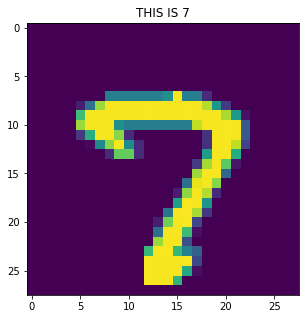

In [27]:
print(len(train_dataset))
print(len(test_dataset))
plt.figure(figsize=(10, 5))

for i in range(5):
    image, label = train_dataset[52]
    plt.imshow(image.squeeze())
    plt.title(f'THIS IS {label}')

In [28]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) #28x28 to 128 (pixels to 128 features)
        self.fc2 = nn.Linear(128, 10) # 128 features to 10 (0 - 9)
    
    def forward(self, x):
        x = x.view(-1, 28*28) #flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleNN() 

In [29]:

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # find maxima/minima
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

train_model()

Epoch 1/5, Loss: 0.3588151124589987
Epoch 2/5, Loss: 0.1686050516328832
Epoch 3/5, Loss: 0.11658498387374698
Epoch 4/5, Loss: 0.08745877094902416
Epoch 5/5, Loss: 0.06909481643327772


In [19]:

# Testing the model
def test_model():
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

test_model()

Accuracy: 97.21%
